In [1]:
#Import All Libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data from CSV file
df=pd.read_csv("Diabetes.csv")

In [3]:
#Info to check datatypes null records count and some basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#View top 5 records
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#View last 5 records
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#Describe to check standard deviation, min ,max and other values for all columns 
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#unique values and their counts
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

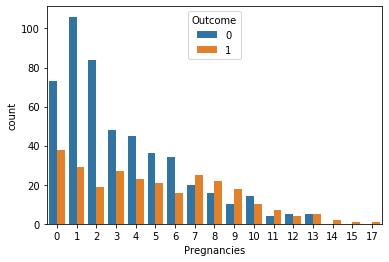

In [7]:
#Count plot Pregnancies vs Outcome
sns.countplot(df["Pregnancies"],hue=df["Outcome"])

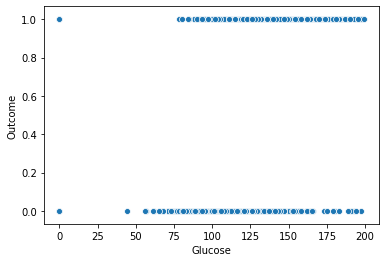

In [8]:
#scatter plot Glucose vs Outcome
sns.scatterplot(x=df["Glucose"],y=df["Outcome"])

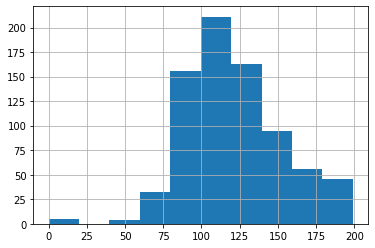

In [9]:
#Histogram to show distribution of Glucose
df["Glucose"].hist()

In [10]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


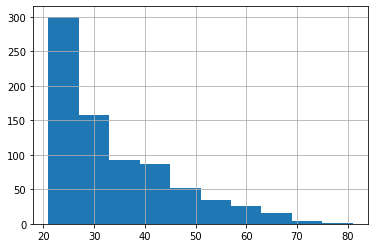

In [11]:
#Histogram to show distribution of Age
df['Age'].hist()

In [12]:
#columns contaning with "0" in values which we have ton remove
zeroval_f=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

In [13]:
#calculating mean value to replace with "0" as per Outcome
mean_val=dict()
for f in zeroval_f:
    mean_val[f]=df.groupby("Outcome")[f].agg(["mean"])

In [14]:
#function to replace "0" with mean values for every column
def replace_zero(feature,val,outcome):
    if val==0:
        return (mean_val[feature]["mean"][outcome])
    else:
        return val


In [15]:
data=df.copy()

In [16]:
#
data["Insulin"][data['Outcome']==0]=data["Insulin"][data['Outcome']==0].apply(lambda x: replace_zero("Insulin",x,0))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
#apply lambda function to apply replacing function 
for f in zeroval_f:
    df[f][df["Outcome"]==0]=df[f][df['Outcome']==0].apply(lambda x: replace_zero(f,x,0))
    df[f][df["Outcome"]==1]=df[f][df['Outcome']==1].apply(lambda x: replace_zero(f,x,1))
    
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691999,72.267826,26.635083,118.967780,32.439222,0.471876,33.240885,0.348958
std,3.369578,30.461151,12.115948,9.636089,93.557899,6.880449,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,19.664000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


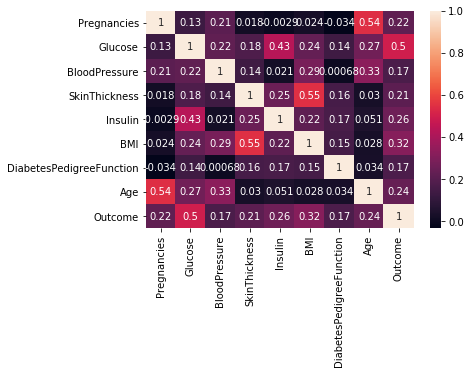

In [19]:
#Heatmap to show correlation between independent and dependent columns
sns.heatmap(df.corr(),annot=True)

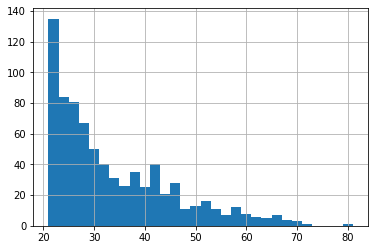

In [20]:
#Histogram of age 
df["Age"].hist(bins=30)

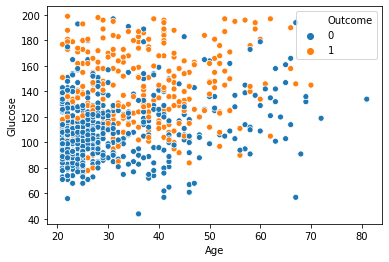

In [21]:
#Scatterplot Age vs Glucose over outcome to find relation between Age and Glucose
sns.scatterplot(x=df["Age"],y=df["Glucose"],hue=df["Outcome"])

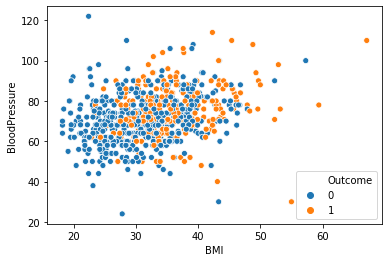

In [22]:
#Scatterplot BMI vs BloodPressure over outcome to find relation between BMI and BloodPressure
sns.scatterplot(x=df["BMI"],y=df["BloodPressure"],hue=df["Outcome"])

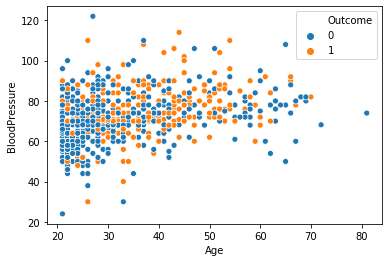

In [23]:
#Scatterplot Age vs BloodPressure over outcome to find relation between age and BloodPressure
sns.scatterplot(x=df["Age"],y=df["BloodPressure"],hue=df["Outcome"])

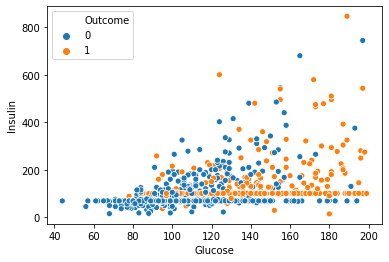

In [24]:
#Scatterplot Glucose vs Insulin over outcome to find relation between Glucose and Insulin
sns.scatterplot(x=df["Glucose"],y=df["Insulin"],hue=df["Outcome"])

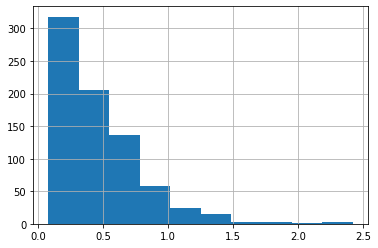

In [25]:
#Histogram of DiabetesPedigreeFunction
df["DiabetesPedigreeFunction"].hist()

In [26]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,100.335821,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,68.792000,26.6,0.351,31,0
2,8,183.0,64.0,22.164179,100.335821,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,68.792000,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,22.164179,100.335821,30.1,0.349,47,1


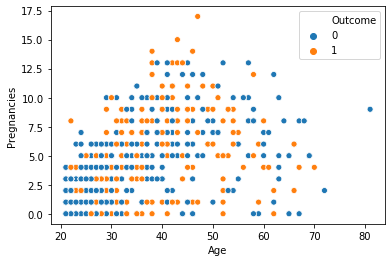

In [27]:
sns.scatterplot(x=df["Age"],y=df["Pregnancies"],hue=df["Outcome"])

In [53]:
# X with independent columns and y with dependent columns
data=df.copy()
X=df.drop(columns="Outcome",axis=1)
y=df["Outcome"]

In [60]:
x1=data[data["Outcome"]==1].copy()
x2=data[data["Outcome"]==0].copy()

In [69]:
X1=pd.concat([x1,x2[0:268]])

In [70]:
y1=X1["Outcome"]
X1=X1.drop(columns="Outcome",axis=1)


In [72]:
X1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000,35.000000,100.335821,33.6,0.627,50
2,8,183.0,64.000,22.164179,100.335821,23.3,0.672,32
4,0,137.0,40.000,35.000000,168.000000,43.1,2.288,33
6,3,78.0,50.000,32.000000,88.000000,31.0,0.248,26
8,2,197.0,70.000,45.000000,543.000000,30.5,0.158,53
...,...,...,...,...,...,...,...,...
428,0,135.0,94.000,46.000000,145.000000,40.6,0.284,26
430,2,99.0,68.184,19.664000,68.792000,22.2,0.108,23
431,3,89.0,74.000,16.000000,85.000000,30.4,0.551,38
432,1,80.0,74.000,11.000000,60.000000,30.0,0.527,22


In [39]:
#Import libaries to split data into train and test data 
from sklearn.model_selection import train_test_split
#Import libaries to scale the data 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sscalar=StandardScaler()
mscalar=MinMaxScaler()
Xs=sscalar.fit_transform(X)
Xm=mscalar.fit_transform(X)
Xs_train,Xs_test,ys_train,ys_test=train_test_split(Xs,y,test_size=0.3)
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,y,test_size=0.3)

In [49]:
#Import libaries for report and diffrent classifiers
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
result=pd.DataFrame(columns=["Regressor","mean","max","min"])
predict=pd.DataFrame(columns=["Regressor","predicted"])
classifier=dict()

In [50]:
#All the classifiers in dictionary
classifier["Log_class"]=LogisticRegression()
classifier["KNN_class"]=KNeighborsClassifier()
classifier["SVM_class"]=SVC(C=1.0,kernel='rbf')
classifier["DT_class"]=DecisionTreeClassifier()
classifier["RF_class"]=RandomForestClassifier()
classifier["GNB_class"]=GaussianNB()

In [51]:
#Trainded on training data and predicted on test data to validate the accuracy, precision and recall with confusion matrix
for clf in classifier:
    classifier[clf].fit(Xs_train,ys_train)
    temp_pred=classifier[clf].predict(Xs_test)
    print(clf)
    print(confusion_matrix(ys_test,temp_pred))
    print(classification_report(ys_test,temp_pred))

Log_class
[[129  25]
 [ 36  41]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       154
           1       0.62      0.53      0.57        77

    accuracy                           0.74       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231

KNN_class
[[126  28]
 [ 27  50]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       154
           1       0.64      0.65      0.65        77

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231

SVM_class
[[130  24]
 [ 33  44]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       154
           1       0.65      0.57      0.61        77

    accuracy                           0.75       231
   macro avg       0.72      

In [52]:
for clf in classifier:
    classifier[clf].fit(Xm_train,ym_train)
    temp_pred=classifier[clf].predict(Xm_test)
    print(clf)
    print(confusion_matrix(ym_test,temp_pred))
    print(classification_report(ym_test,temp_pred))

Log_class
[[125  16]
 [ 38  52]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       141
           1       0.76      0.58      0.66        90

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231

KNN_class
[[121  20]
 [ 37  53]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       141
           1       0.73      0.59      0.65        90

    accuracy                           0.75       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231

SVM_class
[[130  11]
 [ 39  51]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       141
           1       0.82      0.57      0.67        90

    accuracy                           0.78       231
   macro avg       0.80      

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sscalar=StandardScaler()
mscalar=MinMaxScaler()
Xs1=sscalar.fit_transform(X1)
Xm1=mscalar.fit_transform(X1)
Xs_train1,Xs_test1,ys_train1,ys_test1=train_test_split(Xs1,y1,test_size=0.2)
Xm_train1,Xm_test1,ym_train1,ym_test1=train_test_split(Xm1,y1,test_size=0.2)

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
result=pd.DataFrame(columns=["Regressor","mean","max","min"])
predict=pd.DataFrame(columns=["Regressor","predicted"])
classifier1=dict()

In [91]:
classifier1["Log_class"]=LogisticRegression()
classifier1["KNN_class"]=KNeighborsClassifier(n_neighbors=27)
classifier1["SVM_class"]=SVC(C=1.0,kernel='rbf')
classifier1["DT_class"]=DecisionTreeClassifier()
classifier1["RF_class"]=RandomForestClassifier()
classifier1["GNB_class"]=GaussianNB()

In [89]:
# Finding k value for KNeighborsClassifier 
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xm_train1,ym_train1)
    knn_pred=knn.predict(Xm_test1)
    error.append(np.mean(ym_test1!=knn_pred))
knn.

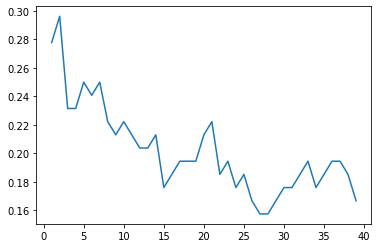

In [90]:
sns.lineplot(x=range(1,40),y=error)

In [85]:
for clf in classifier1:
    classifier1[clf].fit(Xs_train1,ys_train1)
    temp_pred=classifier[clf].predict(Xs_test1)
    print(clf)
    print(confusion_matrix(ys_test1,temp_pred))
    print(classification_report(ys_test1,temp_pred))

Log_class
[[51  4]
 [23 30]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        55
           1       0.88      0.57      0.69        53

    accuracy                           0.75       108
   macro avg       0.79      0.75      0.74       108
weighted avg       0.78      0.75      0.74       108

KNN_class
[[53  2]
 [28 25]]
              precision    recall  f1-score   support

           0       0.65      0.96      0.78        55
           1       0.93      0.47      0.62        53

    accuracy                           0.72       108
   macro avg       0.79      0.72      0.70       108
weighted avg       0.79      0.72      0.70       108

SVM_class
[[55  0]
 [53  0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67        55
           1       0.00      0.00      0.00        53

    accuracy                           0.51       108
   macro avg       0.25      0.50      0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
for clf in classifier1:
    classifier1[clf].fit(Xm_train1,ym_train1)
    temp_pred=classifier1[clf].predict(Xm_test1)
    print(clf)
    print(classifier1[clf].score(Xm_test1,ym_test1))
    print(confusion_matrix(ym_test1,temp_pred))
    print(classification_report(ym_test1,temp_pred))

Log_class
0.7777777777777778
[[46 12]
 [12 38]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        58
           1       0.76      0.76      0.76        50

    accuracy                           0.78       108
   macro avg       0.78      0.78      0.78       108
weighted avg       0.78      0.78      0.78       108

KNN_class
0.8425925925925926
[[46 12]
 [ 5 45]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        58
           1       0.79      0.90      0.84        50

    accuracy                           0.84       108
   macro avg       0.85      0.85      0.84       108
weighted avg       0.85      0.84      0.84       108

SVM_class
0.7592592592592593
[[44 14]
 [12 38]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        58
           1       0.73      0.76      0.75        50

    accuracy                          